## Resources 
- https://paperswithcode.com/sota/image-clustering-on-mnist-full

In [208]:
import torch
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.pyplot as plt
import numpy as np

In [209]:
model2 = torch.load('saved_models/equamnet/mnist_alpha_mlp_4.pth')
model3 = torch.load('saved_models/equamnet/mnist_alpha_mlp_5.pth')
model4 = torch.load('saved_models/equamnet/mnist_alpha_mlp_4.pth')
model5 = torch.load('saved_models/equamnet/mnist_alpha_mlp_5.pth')
model6 = torch.load('saved_models/equamnet/mnist_alpha_mlp_6.pth')
model6_am = torch.load('saved_models/equamnet/mnist_alpha_mlp_6_am.pth')
convnet = torch.load('saved_models/convnet/mnist_alpha_mlp.pth')
perm = torch.load('saved_models/permnet/mnist_alpha_mlp_500.pth')

loss4 = model4['elbo_ests']
loss5 = model5['elbo_ests']
loss6 = model6['elbo_ests']

In [210]:
def avg_plot(arr):
    res = torch.empty(len(arr))
    arr = torch.from_numpy(np.array(arr) * -1)

    for i in range(len(arr)):
        res[i] = torch.mean(arr[:i+1])

    plt.figure()
    plt.plot(res)

def vectors_to_images(vectors):
    return vectors.view(vectors.size(0), 1, 28, 28)

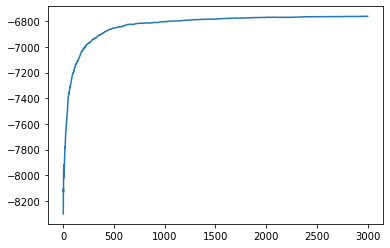

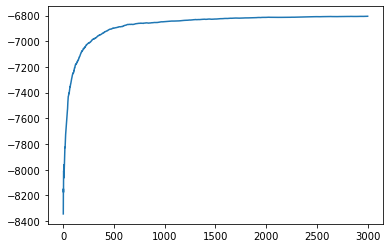

In [211]:
elbos = torch.from_numpy(np.array(model6['elbo_ests']))
elbos = elbos + np.random.normal(0, 25)
avg_plot(elbos)
avg_plot(model6['elbo_ests'])

In [194]:
convnet.keys()

dict_keys(['model_state_dict', 'assignments', 'elbo_ests', 'steps', 'images'])

In [190]:
assignments6 = model6_am['assignments']

labels6 = model6_am['labels']

print('normalized mutual info score', normalized_mutual_info_score(labels6, assignments6))

normalized mutual info score 0.18882996448123698


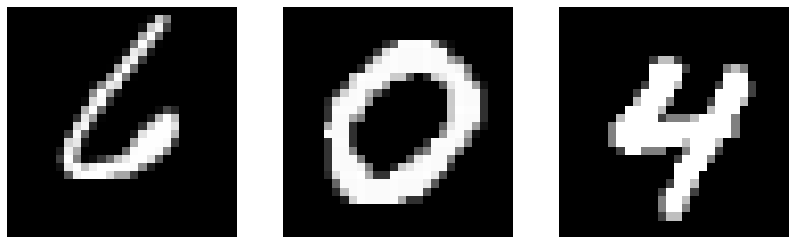

In [207]:
f, (axarr1, axarr2, axarr3) = plt.subplots(1,3, figsize=(14,6))
axarr1.axis("off")
axarr2.axis("off")
axarr3.axis('off')
axarr1.imshow(data[0], cmap='gray')
axarr2.imshow(data[1], cmap='gray')
axarr3.imshow(data[2], cmap='gray')


# f.savefig('../figures/sample_imc_stpt.png')

In [ ]:
# for clust_idx in range(10):
data = model6_am['images'].squeeze()
clust_idx = 7
for i in range(len(assignments6)):
    if assignments6[i] == clust_idx:
        plt.figure()
        plt.imshow(data[i], cmap='gray')

In [ ]:
def display_imgs(folder):
    """
    render images in grid format 
    
    folder: folder containing images to render
    """
    # Define a useful function
    def get_image(f_path):
        '''
        Returns the image from a path
        '''
        img_labs = ['jpg','png']
        if any(x in img_labs for x in f_path.split('.')):
            file = os.path.join(folder, f_path)
            image = open(file, 'rb').read()
            return image
    
    # Do the actual work here
    files  = os.listdir(folder)
    images = [get_image(x) for x in files]
    children = [widgets.Image(value = img, format='png') for img in images if str(type(img)) != '<class \'NoneType\'>']
    
    nrows = math.ceil(math.sqrt(len(children)))
    template = '50% ' * nrows

    # Create the widget
    grid = widgets.GridBox(children=children,
                           layout=widgets.Layout(
                               width='70%',
                               grid_template_columns=template,
                               grid_template_rows=template,
                               grid_gap='18px 2px'
                           )
                          )
    display(grid)